In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
insurance_data=pd.read_csv("insurance.csv")
insurance_data.isnull().sum()
insurance_data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [27]:
insurance_data['smoker']=insurance_data['smoker'].replace({'yes':1,'no':0})
insurance_data['smoker']

C:\Users\Student\AppData\Local\Temp\ipykernel_4648\23001941.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data['smoker']=insurance_data['smoker'].replace({'yes':1,'no':0})


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [28]:
insurance_data['sex']=insurance_data['sex'].replace({'female':1,'male':0})
insurance_data['sex']

C:\Users\Student\AppData\Local\Temp\ipykernel_4648\3881054006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data['sex']=insurance_data['sex'].replace({'female':1,'male':0})


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [29]:
X=insurance_data[['sex','smoker','bmi','age','children']].values
y=insurance_data['charges'].values

In [30]:
X.astype(float)

array([[ 1.  ,  1.  , 27.9 , 19.  ,  0.  ],
       [ 0.  ,  0.  , 33.77, 18.  ,  1.  ],
       [ 0.  ,  0.  , 33.  , 28.  ,  3.  ],
       ...,
       [ 1.  ,  0.  , 36.85, 18.  ,  0.  ],
       [ 1.  ,  0.  , 25.8 , 21.  ,  0.  ],
       [ 1.  ,  1.  , 29.07, 61.  ,  0.  ]], shape=(1338, 5))

In [54]:
def compute_loss(X,y,weight,bias):
    predi=bias + weight*X
    loss=predi - y.shape
    return np.mean((loss)**2)

In [111]:
def gradient_decent(X_batch,y_batch,weight,bias,learning_rate):
    m=len(y_batch)
    prediction = bias + X_batch @ weight
    loss=prediction -y_batch.shape

    weight_gradient =(2/m) * (X_batch.T @ loss)
    bias_gradient =(2/m) *np.sum(loss)

    weight -= learning_rate * weight_gradient
    bias  -= learning_rate * bias_gradient

    return weight,bias
    

In [123]:
def train(X,y,batch_size,epochs):
    np.random.seed(42)
    weight=np.random.randn(X.shape[1])*0.001
    bias =np.random.randn()*0.001
    learning_rate=0.0001
    loss_history=[]

    for epoch in range(epochs):
        indices=np.random.permutation(len(y))
        X_shuffed=X[indices]
        y_shuffed=y[indices]

        for i in range(0,len(y),batch_size):
            X_batch = X_shuffed[i:i+batch_size]
            y_batch = y_shuffed[i:i+batch_size]
            weight,bias=gradient_decent(X_batch,y_batch,weight,bias,learning_rate)
            
        loss = compute_loss(X,y,weight,bias)
        loss_history.append(loss)
    return loss_history
    

In [124]:
full_batch=train(X,y,batch_size=len(X),epochs=500)
mini_batch=train(X,y,batch_size=200,epochs=1000)

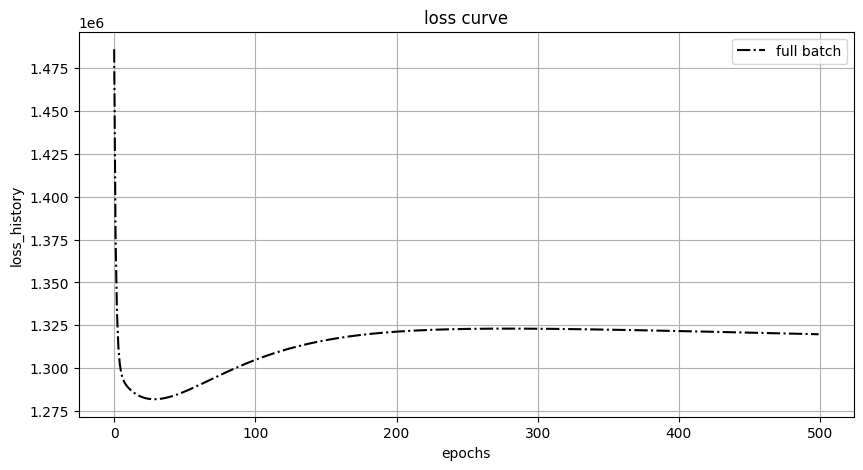

In [116]:
plt.figure(figsize=(10,5))
plt.plot(full_batch,label='full batch', color='black',linestyle='-.')
plt.xlabel('epochs')
plt.ylabel('loss_history')
plt.title('loss curve')
plt.legend()
plt.grid(True)
plt.show()

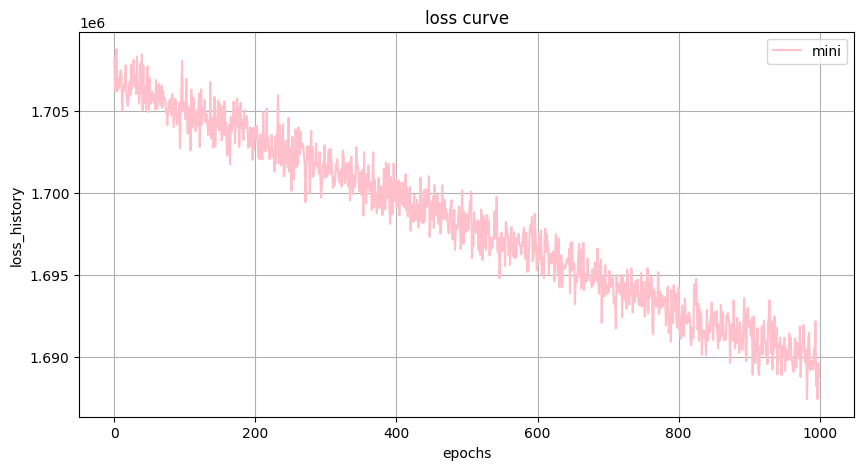

In [125]:
plt.figure(figsize=(10,5))
plt.plot(mini_batch,label='mini',color='pink')
plt.xlabel('epochs')
plt.ylabel('loss_history')
plt.title('loss curve')
plt.legend()
plt.grid(True)
plt.show()

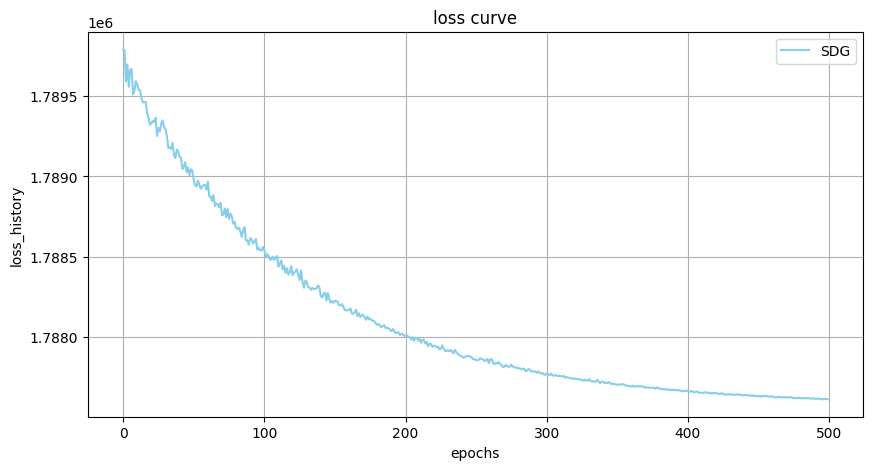

In [117]:
sdg=train(X,y,batch_size=1,epochs=500)
plt.figure(figsize=(10,5))
plt.plot(sdg,label='SDG',color='skyblue')
plt.xlabel('epochs')
plt.ylabel('loss_history')
plt.title('loss curve')
plt.legend()
plt.grid(True)
plt.show()